In [32]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from warnings import filterwarnings
filterwarnings("ignore")

In [20]:
df = pd.read_csv('dataset_group.csv')

In [21]:
df.head()

Date  Order_id        Product
0  01-01-2018         1         yogurt
1  01-01-2018         1           pork
2  01-01-2018         1  sandwich bags
3  01-01-2018         1     lunch meat
4  01-01-2018         1   all- purpose

In [22]:
df.shape

(20641, 3)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [24]:
df.describe(include='all').T

count unique         top freq        mean         std  min    25%  \
Date        20641    603  08-02-2019  183         NaN         NaN  NaN    NaN   
Order_id  20641.0    NaN         NaN  NaN  575.986289  328.557078  1.0  292.0   
Product     20641     37     poultry  640         NaN         NaN  NaN    NaN   

            50%    75%     max  
Date        NaN    NaN     NaN  
Order_id  581.0  862.0  1139.0  
Product     NaN    NaN     NaN

In [25]:
pre_check_eda = pd.DataFrame()
pre_check_eda['Null values']=df.isnull().sum()
pre_check_eda['Data types']=df.dtypes
pre_check_eda

Null values Data types
Date                0     object
Order_id            0      int64
Product             0     object

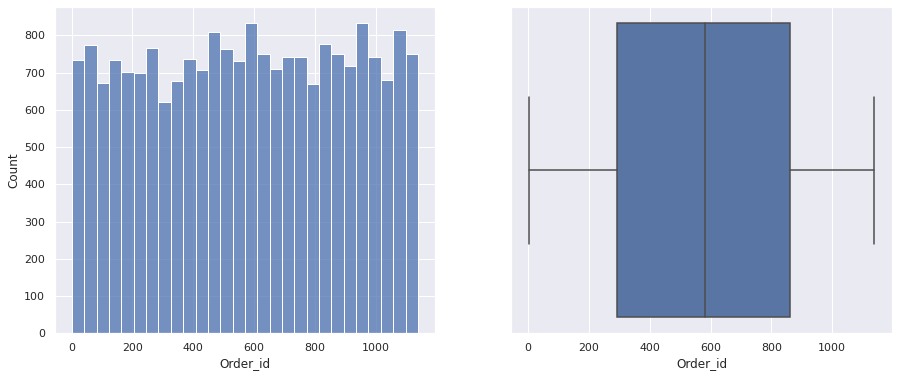

In [26]:
numerical = df.select_dtypes('number').columns
feature_list = df.columns
for i in numerical:
    fig, ax = plt.subplots(1, 2, figsize=(15,6))
    sns.histplot(data=df, x=i, ax=ax[0])
    sns.boxplot(x=i, data=df, width=0.9, ax=ax[1])

In [27]:
df1 = pd.read_csv('mba_csv_output.csv')

In [28]:
df1.head()

Support  Confidence      Lift Recommended_item Recommended_with  \
0  0.050044    0.640449  1.700401            juice             <---   
1  0.050044    0.619565  1.644953            juice             <---   
2  0.050044    0.612903  1.615965       coffee/tea             <---   
3  0.050044    0.600000  1.423750          poultry             <---   
4  0.050922    0.630435  1.677722            mixes             <---   

                                          Items_list  
0              [yogurt, toilet paper, aluminum foil]  
1                   [yogurt, poultry, aluminum foil]  
2                         [yogurt, cheeses, cereals]  
3  [dishwashing liquid/detergent, laundry deterge...  
4                   [yogurt, poultry, aluminum foil]

In [29]:
df1.describe().T

count      mean       std       min       25%       50%       75%  \
Support      24.0  0.051983  0.001775  0.050044  0.050922  0.051800  0.052239   
Confidence   24.0  0.630940  0.021766  0.600000  0.615992  0.630217  0.641505   
Lift         24.0  1.617415  0.084795  1.423750  1.583164  1.621006  1.653101   

                 max  
Support     0.055312  
Confidence  0.686047  
Lift        1.791193

In [30]:
df1.describe(include='object').T

count unique                               top freq
Recommended_item    24     13                           poultry    5
Recommended_with    24      1                              <---   24
Items_list          24     23  [yogurt, poultry, aluminum foil]    2

In [31]:
df1.sort_values('Lift')

Support  Confidence      Lift Recommended_item Recommended_with  \
3   0.050044    0.600000  1.423750          poultry             <---   
15  0.051800    0.602041  1.428593          poultry             <---   
9   0.050922    0.637363  1.512408          poultry             <---   
19  0.053556    0.655914  1.556429          poultry             <---   
7   0.050922    0.617021  1.558287          cereals             <---   
20  0.055312    0.623762  1.564902        ice cream             <---   
10  0.050922    0.604167  1.589251             milk             <---   
11  0.051800    0.627660  1.610145             eggs             <---   
14  0.051800    0.627660  1.613779     dinner rolls             <---   
2   0.050044    0.612903  1.615965       coffee/tea             <---   
21  0.055312    0.630000  1.616149             eggs             <---   
8   0.050922    0.630435  1.620915     dinner rolls             <---   
17  0.051800    0.602041  1.621098            pasta             <---   
16  0.051800    0.634409  1.627458             eggs             <---   
13  0.051800    0.686047  1.627931          poultry             <---   
1   0.050044    0.619565  1.644953            juice             <---   
12  0.051800    0.641304  1.648862     dinner rolls             <---   
18  0.053556    0.642105  1.650921     dinner rolls             <---   
5   0.050922    0.610526  1.659641    sandwich bags             <---   
4   0.050922    0.630435  1.677722            mixes             <---   
0   0.050044    0.640449  1.700401            juice             <---   
6   0.050922    0.674419  1.726209          cheeses             <---   
22  0.055312    0.642857  1.731003            pasta             <---   
23  0.055312    0.649485  1.791193     paper towels             <---   

                                           Items_list  
3   [dishwashing liquid/detergent, laundry deterge...  
15             [dinner rolls, spaghetti sauce, juice]  
9            [dinner rolls, spaghetti sauce, cereals]  
19  [dinner rolls, spaghetti sauce, laundry deterg...  
7                    [cheeses, bagels, sandwich bags]  
20                        [paper towels, eggs, pasta]  
10              [poultry, laundry detergent, cereals]  
11                      [dinner rolls, poultry, soda]  
14                  [spaghetti sauce, poultry, juice]  
2                          [yogurt, cheeses, cereals]  
21                   [paper towels, ice cream, pasta]  
8                 [spaghetti sauce, poultry, cereals]  
17                 [paper towels, eggs, dinner rolls]  
16                [paper towels, dinner rolls, pasta]  
13         [dinner rolls, spaghetti sauce, ice cream]  
1                    [yogurt, poultry, aluminum foil]  
12              [spaghetti sauce, poultry, ice cream]  
18      [spaghetti sauce, poultry, laundry detergent]  
5                          [cheeses, bagels, cereals]  
4                    [yogurt, poultry, aluminum foil]  
0               [yogurt, toilet paper, aluminum foil]  
6                    [bagels, cereals, sandwich bags]  
22                    [paper towels, eggs, ice cream]  
23                           [eggs, ice cream, pasta]